In [19]:
import pandas as pd
import seaborn as sns

In [20]:
train = pd.read_csv('./data/train.csv')

In [21]:
test = pd.read_csv('./data/test.csv')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Information about training sets in Titanic Datasets
The training sets has 891 examples and 11 features  with 1 target variable

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Above we can see that out of 891 people Acc. to the datasets only 38% of them survived
* we can also see that passengs are people aged from 0.4 to 80

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* from above datasets we can see that there are lots of non-numeric data
* from above we can also see that some of the columns like 'Name' and 'Ticket' are rather highly random
* Hence we can drop the these columns

In [25]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### From above table we can draw few important conclusions
* only 2 Embarked values are missing which can easily be filled using different methods
* since Age features has 177 missing values it will be more tricky to fill the age values
* And looking up for cabin features we can see 687 missing features so we better drop the cabin features since with very small given value of cabin it is hard to fill the missing data  in cabin features

In [26]:
train = train.drop(['Cabin','Ticket','Name'],axis=1)

### Dropping the columns on the basis of following reasons
* Cabins has more than 80% of value missing
* Ticket and Name are higly randiom alphaNumeric value and hard to draw conclusion with these two features in data analysis

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
import matplotlib.pyplot as plt

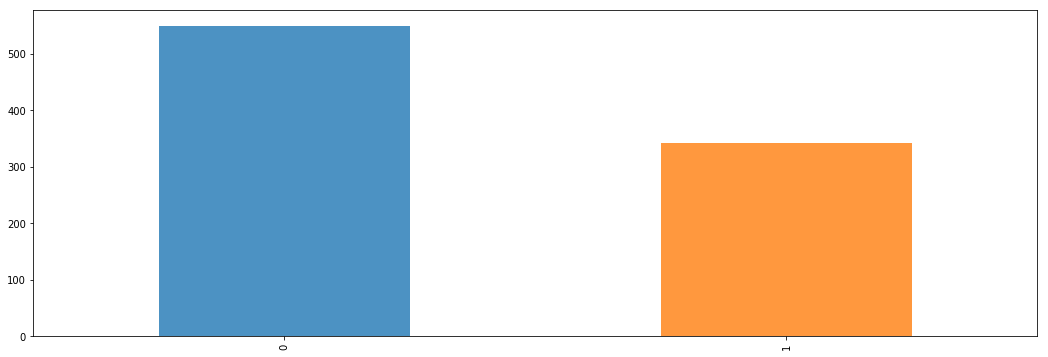

In [29]:
fig = plt.figure(figsize=(18,6))
train['Survived'].value_counts().plot(kind="bar",alpha=0.8)

* we can see that most of the passengers in titanic did lose their life

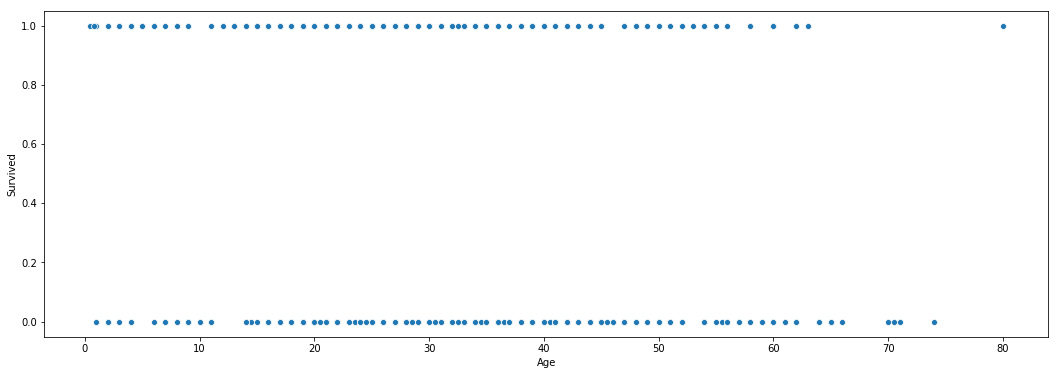

In [30]:
fig, ax = plt.subplots(figsize=(18,6))
sns.scatterplot(x='Age',y='Survived',data=train,ax=ax)

from  above plot we can see that mostly older people didn't make it

lets add 3rd dimension 

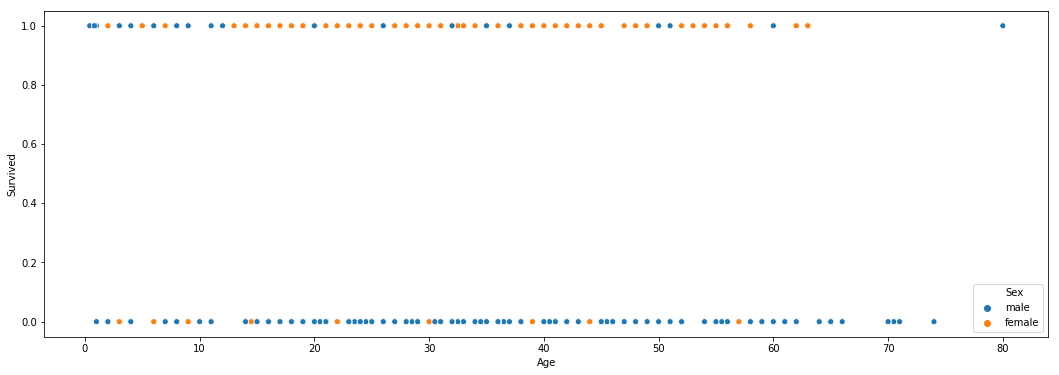

In [31]:
fig, ax = plt.subplots(figsize=(18,6))
sns.scatterplot(x='Age',y='Survived',data=train,ax=ax,hue='Sex')

* from above figure we can see that survival rate of female is higher than male  among any age group

In [32]:
train = train.drop(['PassengerId'],axis = 1)

In [34]:
train["Sex"]=train["Sex"].replace("female",0)
train["Sex"]=train["Sex"].replace("male",1)

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [35]:
youngling = train[train['Age']< 18]
youngling

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,1,2.00,3,1,21.0750,S
9,1,2,0,14.00,1,0,30.0708,C
10,1,3,0,4.00,1,1,16.7000,S
14,0,3,0,14.00,0,0,7.8542,S
16,0,3,1,2.00,4,1,29.1250,Q
22,1,3,0,15.00,0,0,8.0292,Q
24,0,3,0,8.00,3,1,21.0750,S
39,1,3,0,14.00,1,0,11.2417,C
43,1,2,0,3.00,1,2,41.5792,C
50,0,3,1,7.00,4,1,39.6875,S


In [36]:
young = train[train['Age'] >17]
young = train[train['Age'] <36]

In [37]:
older = train[train['Age'] >35]
older = train[train['Age'] <60]

In [38]:
oldest = train[train['Age'] > 59]

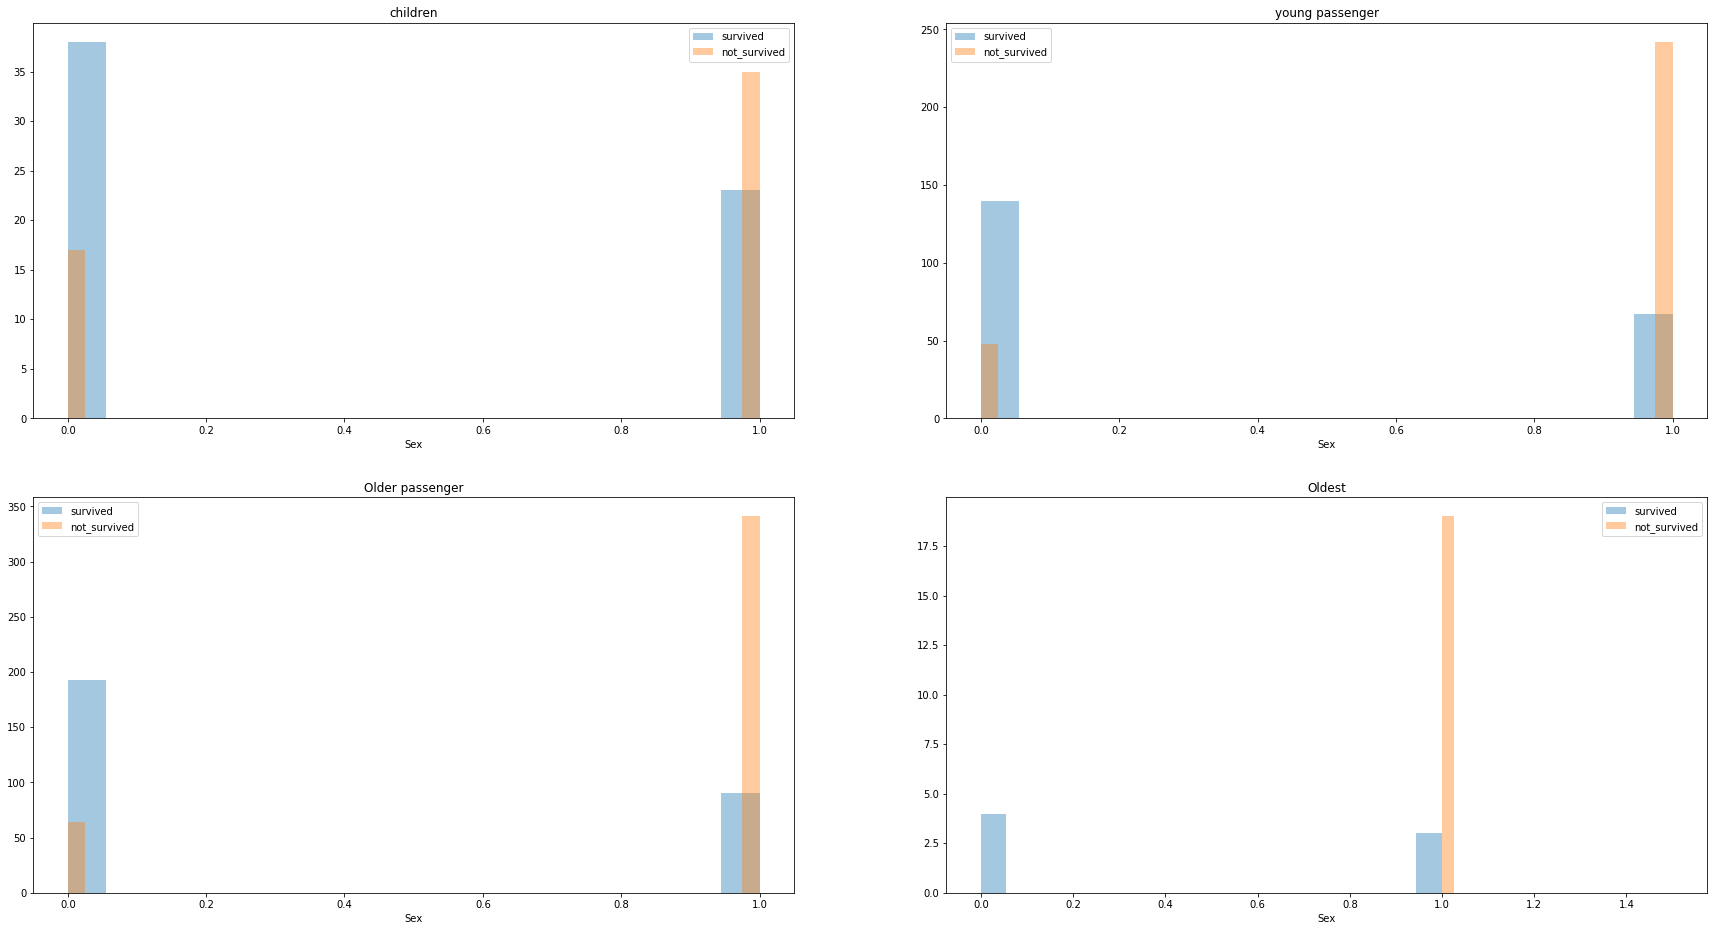

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(30, 16))
ax = sns.distplot(youngling[youngling['Survived']==1].Sex, bins=18, label = 'survived', ax = axes[0,0], kde =False)
ax = sns.distplot(youngling[youngling['Survived']==0].Sex, bins=40, label = 'not_survived', ax = axes[0,0], kde =False)
ax.legend()
ax.set_title('children')
ax = sns.distplot(young[young['Survived']==1].Sex, bins=18, label = 'survived', ax = axes[0,1], kde =False)
ax = sns.distplot(young[young['Survived']==0].Sex, bins=40, label = 'not_survived', ax = axes[0,1], kde =False)
ax.legend()
ax.set_title('young passenger')
ax = sns.distplot(older[older['Survived']==1].Sex, bins=18, label = 'survived', ax = axes[1,0], kde = False)
ax = sns.distplot(older[older['Survived']==0].Sex, bins=40, label = 'not_survived', ax = axes[1,0], kde = False)
ax.set_title('Older passenger')
ax.legend()
ax = sns.distplot(oldest[oldest['Survived']==1].Sex, bins=18, label = 'survived', ax = axes[1,1], kde = False)
ax = sns.distplot(oldest[oldest['Survived']==0].Sex, bins=40, label = 'not_survived', ax = axes[1,1], kde = False)
ax.set_title('Oldest')
ax.legend()

## Conclusion from above plot are
* children are who are female are survived more than male children 
* same as the children female are more survived than male among passsenger of age range 18 - 36
* but in age group of oldest people the survival rate of female is same as the male

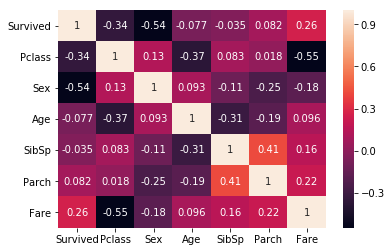

In [41]:
sns.heatmap(train.corr(), annot=True)

In [43]:
display(train.corr().Survived)

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

#### from above table we can conclude that survived and fare , survived and Sex are highly correlated

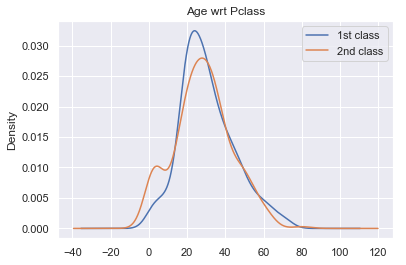

In [72]:
for x in [0,1]:
    train.Age[train.Survived == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st class","2nd class","3rd class"))

#### From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious.

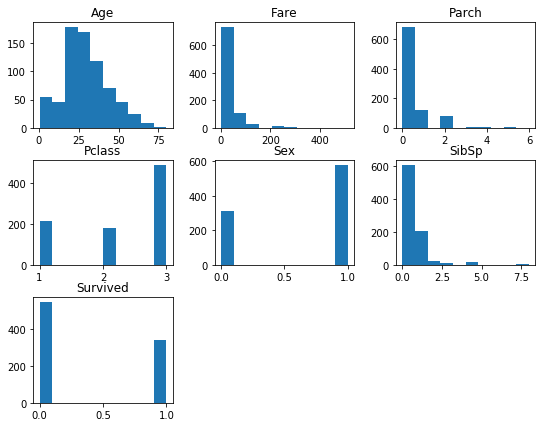

In [50]:
train.hist(bins=10,figsize=(9,7),grid=False);

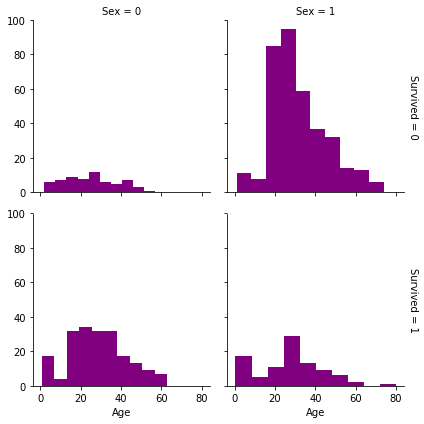

In [48]:
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")

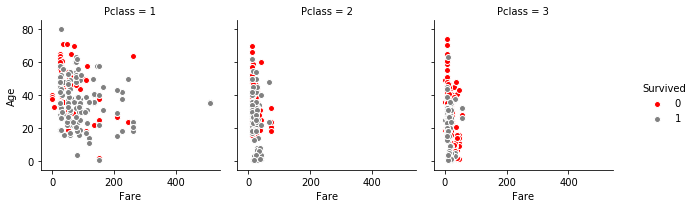

In [52]:
g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"gray", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

* It is shown that 3rd class people dead count is greater than 1st class people  and 2nd class people
* And Also 3rd class people dead count is from all Age group while 2nd class people age count is mostly from > 60 and 20 and 40

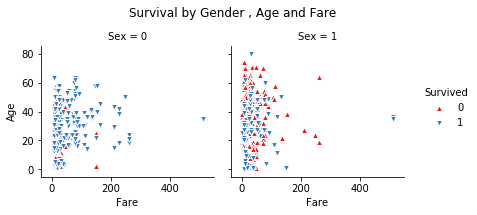

In [53]:
g = sns.FacetGrid(train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

#### from above plots it is shown that male with less fare are the one primary victim of titanic tragedy 

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


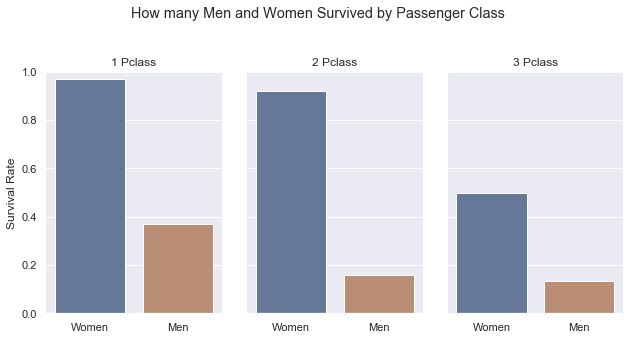

In [55]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Women", "Men"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

* It is seen that from above plot Women has higher survival rate in first 2 Pclass
* It is seen that  Men has lower chance of Survival in all class

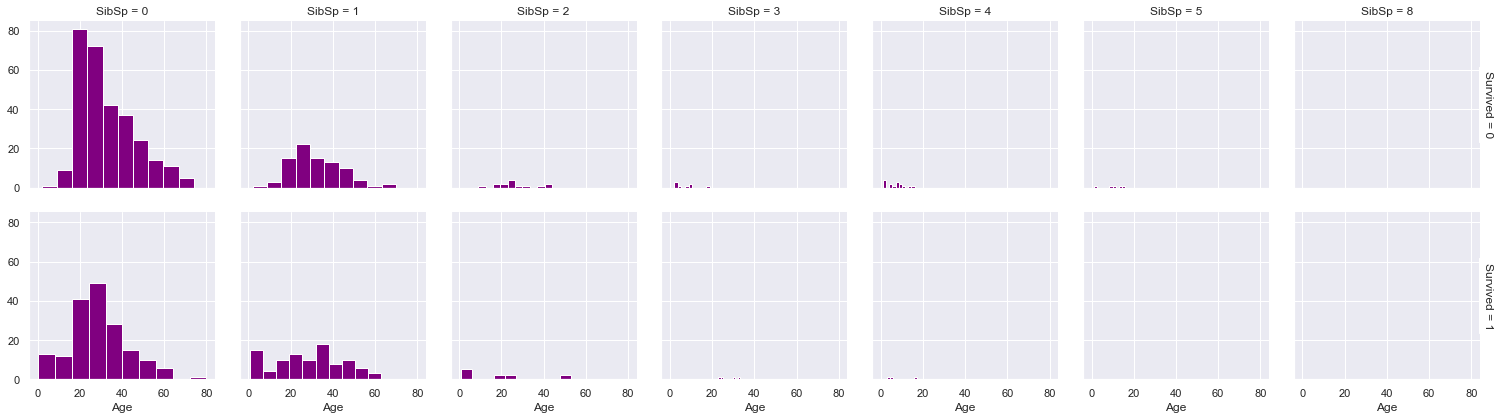

In [58]:
g = sns.FacetGrid(train, col="SibSp", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")

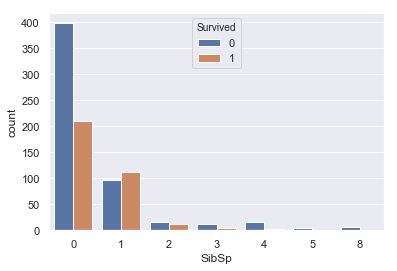

In [61]:
sns.countplot(x='SibSp',hue='Survived',data=train)

#### from above two plots we can conclude that survival rate of passenger who has no sibling or 1 sibling is very high or we can say that most of the passenger has no sibling or 1 sibling and among them many of passenger died in titanic tragedy

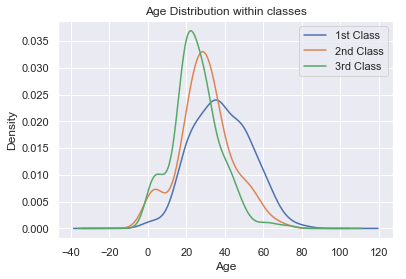

In [64]:
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

#### from above density plot we can see that 1st class  passenger have high density of age group 18 to 38 and 2nd and third class people has high density of age group 22 to 45

In [65]:
train['relatives'] = train['SibSp'] + train['Parch']
train.loc[train['relatives'] > 0, 'not_alone'] = 0
train.loc[train['relatives'] == 0, 'not_alone'] = 1
train['not_alone'] = train['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


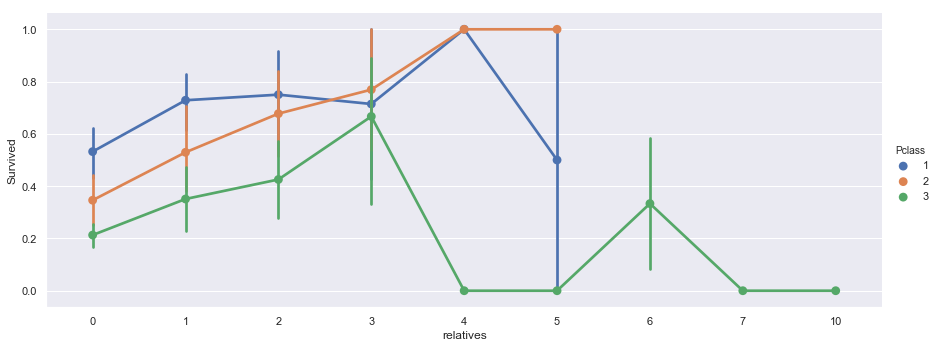

In [68]:
sns.factorplot('relatives','Survived', data=train, aspect = 2.5, hue='Pclass')

#### According to the above plot we can see that we can see those who have relatives in the range of 0 to 3 has higher survival rate.
#### and we can also see that 3rd class people also has higher sibling and low survival rate  where as middle class people has higher survival rate having range of relatives  but under the range of 0 to 3 relatives of 1st class people they have higher survival rate than other classes of passenger

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


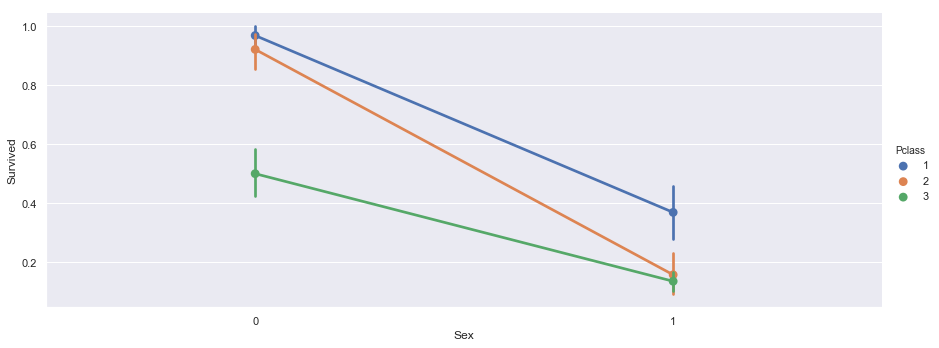

In [74]:
sns.factorplot('Sex','Survived', data=train, aspect = 2.5, hue='Pclass')

### So from above plot we can draw conclusion that female of 1st class and 2nd class has higher chance of survival than female of 3rd class  and  In comparision with female Male has very low rate of surivival than female of every class

## Conclusion
* First Inspecting dataset we get that there are some random values features like ticket which we can ignore without affecting the overall output of future prediction
* We also find that some of the features like age , sex and Pclass are highly coorelated with survived.
* We can also find that 38% of passenger are survived  and most of them are female
* we can also see that chance of survival of higher class passenger are higher than lower class people.
* We can visualize female having 2 parents did not survived
* Histogram diagram also shows that Most of the people onboarding that day are of age more than 35.
* Survival rate of male and female in age group between 0 to 16 are just opposite.
*  More girls either married or unmarried were alive in accident¶